In [1]:
# 1. Use ‘kc_house_data.csv’ data set. Split the dataset in
# Training and Testing Part. Apply Simple Linear regression
# (sqft_living, price) and multiple linear regression for house
# price prediction. Comment on accuracy of the predictions on
# test data set.

In [2]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML datasets/ML_datasets/kc_house_data.csv')
df.dropna(inplace= True)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [13]:
df.info

<bound method DataFrame.info of                id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   

In [3]:
x = df[['sqft_living']]
y = df[['price']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17288, 1), (4323, 1), (17288, 1), (4323, 1))

In [4]:
x

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680
...,...
21608,1530
21609,2310
21610,1020
21611,1600


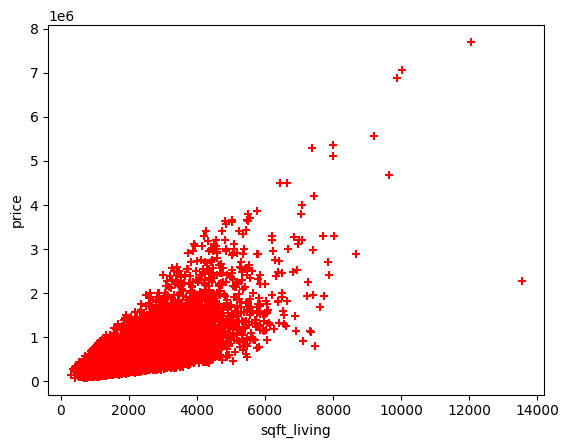

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.scatter(df.sqft_living,df.price,color='red',marker='+')

In [15]:
#Simple linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)



LinearRegression()

In [23]:
#predicting for x test
y_pred = lin_reg.predict(x_test)
y_pred

array([[695209.00895162],
       [360648.70263236],
       [349588.85779536],
       ...,
       [247285.29305311],
       [786452.72885687],
       [526546.37518736]])

In [20]:
lin_reg.predict([[1680]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[429772.73286361]])

In [8]:
lin_reg.coef_,lin_reg.intercept_

(array([[276.49612093]]), array([-34740.7502904]))

In [9]:
276.49612093*1680+-34740.7502904

429772.732872

In [10]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
print("Linear Regression:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared (R2): {r2_score(y_test, y_pred)}")

Linear Regression:
Mean Squared Error: 74448995966.77663
R-squared (R2): 0.5016846041550944


In [11]:
# Select multiple features for multiple linear regression
X_multi = df[['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot']]

# Split the data into a training set and a testing set
X_train_multi, X_test_multi, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# Create a multiple linear regression model
multi_lr = LinearRegression()

# Fit the model on the training data
multi_lr.fit(X_train_multi, y_train)

# Make predictions on the test data
y_pred_multi = multi_lr.predict(X_test_multi)

# Calculate the accuracy metrics for multiple linear regression
mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print("\nMultiple Linear Regression Metrics:")
print("Mean Squared Error:", mse_multi)
print("R-squared:", r2_multi)



Multiple Linear Regression Metrics:
Mean Squared Error: 72297941407.58865
R-squared: 0.5160824290045267


In [24]:
y_pred_multi = multi_lr.predict(X_test_multi)
y_pred_multi

array([[679682.62966641],
       [370479.24894993],
       [351972.5635653 ],
       ...,
       [290156.72088538],
       [713623.58474029],
       [554088.63904308]])

In [12]:
multi_lr.coef_,multi_lr.intercept_

(array([[ 3.09552312e+02, -6.20627057e+04,  9.64376501e+03,
         -3.42368041e-01]]),
 array([90651.35715183]))